# III. Modeling

In [1]:
# import libraries

import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.metrics import confusion_matrix,f1_score,classification_report,roc_curve,auc

In [2]:
# Import data

df = pd.read_csv('Data/Balanced_df',index_col=0)

In [3]:
df.head()

,points,total_rebounds,assists,blocks,true_shooting_percentage,weight,height,target,position_Forward,position_Guard
17991,589.0,192.0,73.0,25.0,0.633,195.0,77.0,1,0,1
23510,1465.0,823.0,257.0,71.0,0.587,218.0,77.0,1,0,1
29886,1658.0,265.0,111.0,27.0,0.648,215.0,76.0,1,0,1
17151,1009.0,267.0,170.0,13.0,0.555,195.0,76.0,1,0,1
18192,720.0,186.0,79.0,11.0,0.590,207.0,77.0,1,0,1


First things we should do is normalizing our data.. Which i didnt do in the data cleaning portion. We will be normalizing because our feature are scaled differently. For example points( total points a player score in his career) can go north of 1000 but weight is limit to < ~300.

In [4]:
#Normalizing the data , Formula Xi - X.min / X.max - X.min

df = df.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
df.head()

,points,total_rebounds,assists,blocks,true_shooting_percentage,weight,height,target,position_Forward,position_Guard
17991,0.186209,0.112110,0.075103,0.044326,0.823729,0.264706,0.50,1.0,0.0,1.0
23510,0.464569,0.490408,0.264403,0.125887,0.745763,0.400000,0.50,1.0,0.0,1.0
29886,0.525898,0.155875,0.114198,0.047872,0.849153,0.382353,0.45,1.0,0.0,1.0
17151,0.319670,0.157074,0.174897,0.023050,0.691525,0.264706,0.45,1.0,0.0,1.0
18192,0.227836,0.108513,0.081276,0.019504,0.750847,0.335294,0.50,1.0,0.0,1.0


In [5]:
# split the data 

X_train,x_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df['target'],random_state=0,test_size=0.33)

# X_train : training data,
# x_test : testing data,
# y_train : target variable of training data
# y_test : target variable of testing data

## Logistic Regression

In [6]:
# logreg = LogisticRegression(fit_intercept=False,C=1e12,max_iter=2000)
logreg = LogisticRegression(fit_intercept=False,solver='liblinear',random_state=4)
model_log = logreg.fit(X_train,y_train)
model_log

LogisticRegression(fit_intercept=False, random_state=4, solver='liblinear')

In [7]:
# models predicted values
logpred_test = logreg.predict(x_test)
logpred_train = logreg.predict(X_train)

In [8]:
# We could subtract the two columns. If values are equal, difference will be zero. Then count number of zeros 

residuals = np.abs(y_train - logpred_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    733
1.0    286
Name: target, dtype: int64
0.0    0.719333
1.0    0.280667
Name: target, dtype: float64


In [9]:
residuals = np.abs(y_test - logpred_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0.0    362
1.0    141
Name: target, dtype: int64
0.0    0.719682
1.0    0.280318
Name: target, dtype: float64


Logistic Regression model was able to predict correctly ~76% in both our training and testing data

In [10]:
# cf on training data

cf = confusion_matrix(y_train, logpred_train)
cf

array([[360, 148],
       [138, 373]], dtype=int64)

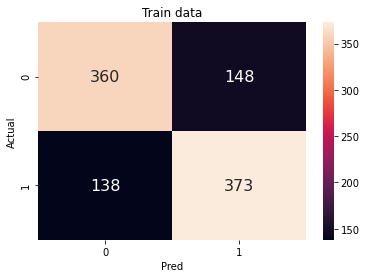

In [11]:
# heat meat for vis
plt.title('Train data')
sns.heatmap(cf,annot=True,annot_kws={'size':16},fmt='g')
plt.xlabel('Pred')
plt.ylabel('Actual');

In [12]:
# cf on test data

cf = confusion_matrix(y_test, logpred_test)
cf

array([[168,  85],
       [ 56, 194]], dtype=int64)

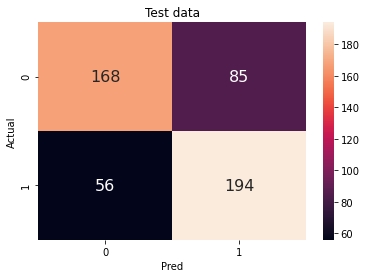

In [13]:
# heat meat for vis
plt.title('Test data')
sns.heatmap(cf,annot=True,annot_kws={'size':16},fmt='g')
plt.xlabel('Pred')
plt.ylabel('Actual');

Focusing sololy on our testing data, the logistic regression model was able to correctly predict 362 players correctly(168 undrafted/194 drafted) and 121 incorrectly giving us an percision accuracy of ~72%.

In [14]:
# model evaluation

print(classification_report(y_test,logpred_test))

print('Accuracy Score : ' + str(accuracy_score(y_test,logpred_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70       253
         1.0       0.70      0.78      0.73       250

    accuracy                           0.72       503
   macro avg       0.72      0.72      0.72       503
weighted avg       0.72      0.72      0.72       503

Accuracy Score : 0.7196819085487077


AUC: 0.7999683794466403


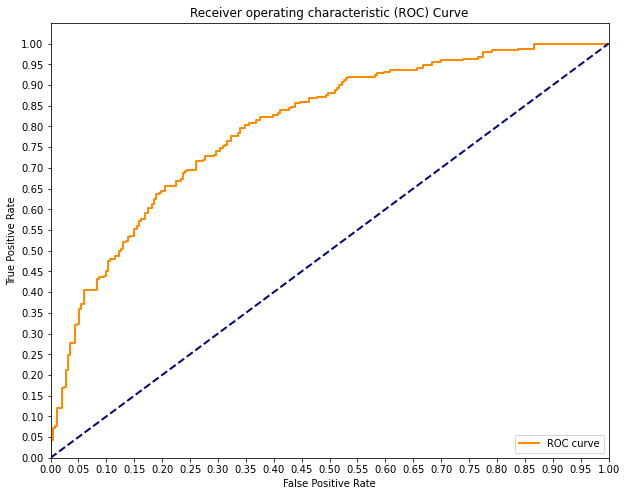

In [15]:
y_score = logreg.fit(X_train, y_train).decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Grid Search to Improve Logistic Regression

In [16]:
grid_values = {'penalty': ['l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

grid_clf_acc = GridSearchCV(LogisticRegression(), param_grid = grid_values,scoring = 'accuracy')

grid_clf_acc.fit(X_train, y_train)

print(f' Best params - {grid_clf_acc.best_params_}')

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(x_test)

# New Model Evaluation metrics 

print(classification_report(y_test,y_pred_acc))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))

 Best params - {'C': 25, 'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       253
         1.0       0.79      0.79      0.79       250

    accuracy                           0.79       503
   macro avg       0.79      0.79      0.79       503
weighted avg       0.79      0.79      0.79       503

Accuracy Score : 0.7892644135188867


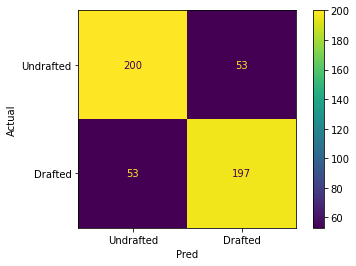

In [17]:
#Logistic Regression (Grid Search) Confusion matrix

plot_confusion_matrix(grid_clf_acc,x_test,y_test,display_labels=['Undrafted','Drafted'])
plt.xlabel('Pred')
plt.ylabel('Actual');

In [18]:
log_report = classification_report(y_test,y_pred_acc,output_dict=True)
log = pd.DataFrame(log_report).transpose()
log

,precision,recall,f1-score,support
0.0,0.790514,0.790514,0.790514,253.000000
1.0,0.788000,0.788000,0.788000,250.000000
accuracy,0.789264,0.789264,0.789264,0.789264
macro avg,0.789257,0.789257,0.789257,503.000000
weighted avg,0.789264,0.789264,0.789264,503.000000


AUC: 0.8784031620553361


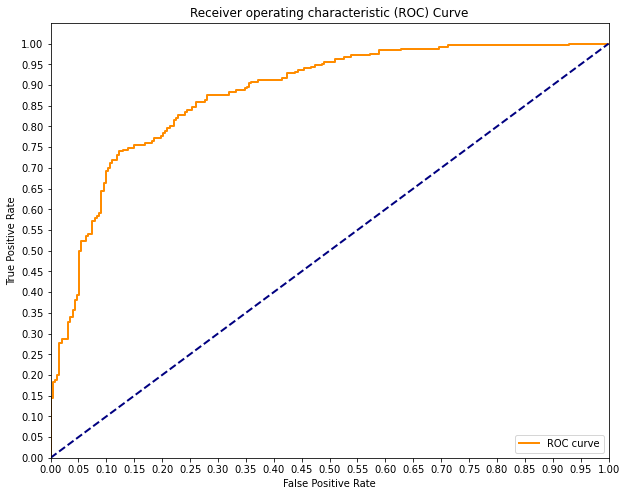

In [19]:
y_score = grid_clf_acc.fit(X_train, y_train).decision_function(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

In [20]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(random_state=4)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

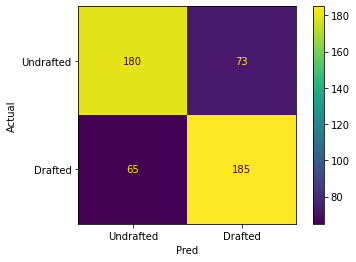

In [21]:
plot_confusion_matrix(clf,x_test,y_test,display_labels=['Undrafted','Drafted'])

plt.xlabel('Pred')
plt.ylabel('Actual');

In [22]:
clf.score(x_test,y_test)

0.7256461232604374

In [23]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

lst = []

for i in ccp_alphas:
    """
    loops through an array of alpha values and uses it as a parameter for a decision tree model and append the fitted model to an
    empty list
    """
    clf = DecisionTreeClassifier(random_state=4, ccp_alpha=i)
    clf.fit(X_train,y_train)
    lst.append(clf)

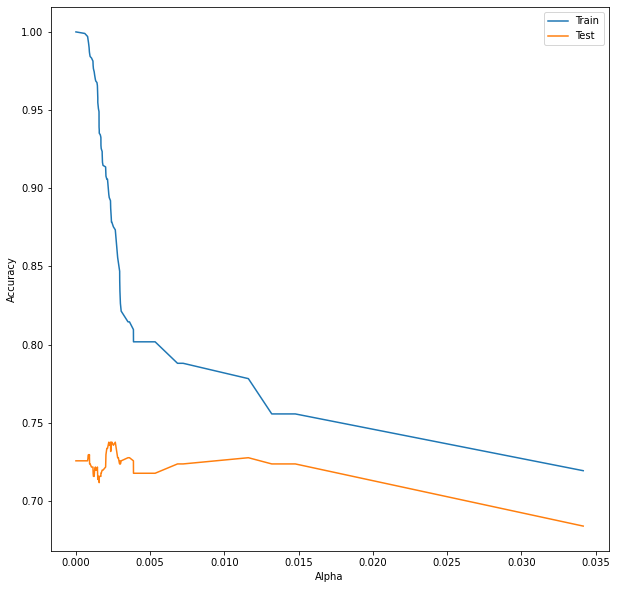

In [24]:
# plot the scores for training v testing

train_scores = [i.score(X_train,y_train) for i in lst]
test_scores = [i.score(x_test,y_test) for i in lst]

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas,train_scores)
ax.plot(ccp_alphas,test_scores)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Alpha')
ax.legend(['Train','Test']);

Rough estimate, it seems like the best accuracy for testing data would be alpha = 0.0025 

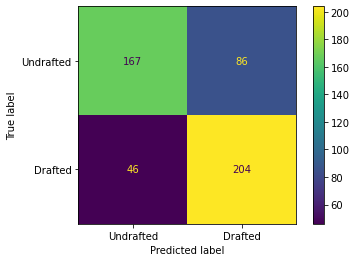

In [25]:
clf = DecisionTreeClassifier(random_state=4,ccp_alpha=0.0025)
clf.fit(X_train,y_train)

plot_confusion_matrix(clf,x_test,y_test,display_labels=['Undrafted','Drafted']);

In [26]:
# mean accuracy

clf.score(x_test,y_test)

0.7375745526838966

In [27]:
dtreepred_test = clf.predict(x_test)

In [28]:
dtree_report = classification_report(y_test,dtreepred_test,output_dict=True)
dtree = pd.DataFrame(dtree_report).transpose()
dtree

,precision,recall,f1-score,support
0.0,0.784038,0.660079,0.716738,253.000000
1.0,0.703448,0.816000,0.755556,250.000000
accuracy,0.737575,0.737575,0.737575,0.737575
macro avg,0.743743,0.738040,0.736147,503.000000
weighted avg,0.743983,0.737575,0.736031,503.000000


## Support Vector Machine

In [29]:
svm = SVC(random_state=4)

In [30]:
svm.fit(X_train,y_train)

SVC(random_state=4)

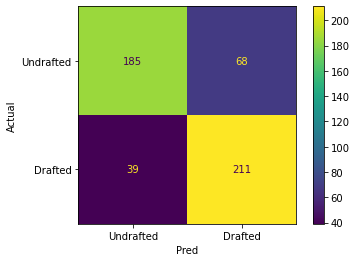

In [31]:
plot_confusion_matrix(svm,x_test,y_test,display_labels=['Undrafted','Drafted'])
plt.xlabel('Pred')
plt.ylabel('Actual');

In [32]:
svm.score(x_test,y_test)

0.7872763419483101

### Cross Validation and GridSearchCV()

In [33]:
param_grid = [{'C': [0.5,10,100,1000],
               'gamma' : [1,0.1,0.001,0.0001]}]

optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy')

optimal_params.fit(X_train,y_train)
optimal_params.best_params_

{'C': 1000, 'gamma': 0.1}

This tells us that we will get our best results by setting the params of our SVC model to C = 1000 and gamma = 0.1

In [34]:
# Train another support vector machine with the optimized params

svm_optimized = SVC(random_state=4,C=1000,gamma=0.1)
svm_optimized.fit(X_train,y_train)

SVC(C=1000, gamma=0.1, random_state=4)

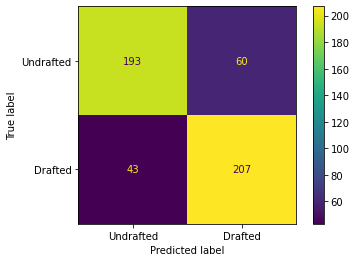

In [35]:
plot_confusion_matrix(svm_optimized,x_test,y_test,display_labels=['Undrafted','Drafted']);

In [36]:
svm_optimized.score(x_test,y_test)

0.7952286282306164

In [37]:
svmpred_test = svm_optimized.predict(x_test)

svm_report = classification_report(y_test,svmpred_test,output_dict=True)
supp = pd.DataFrame(svm_report).transpose()
supp

,precision,recall,f1-score,support
0.0,0.817797,0.762846,0.789366,253.000000
1.0,0.775281,0.828000,0.800774,250.000000
accuracy,0.795229,0.795229,0.795229,0.795229
macro avg,0.796539,0.795423,0.795070,503.000000
weighted avg,0.796666,0.795229,0.795036,503.000000


### Model Evaluation

In [38]:
accuracy_df = pd.concat([log.loc['accuracy'],dtree.loc['accuracy'],supp.loc['accuracy']],axis=1,)
accuracy_df.columns = ['Logistic Regression','Decision Tree','SVM']

accuracy_df

,Logistic Regression,Decision Tree,SVM
precision,0.789264,0.737575,0.795229
recall,0.789264,0.737575,0.795229
f1-score,0.789264,0.737575,0.795229
support,0.789264,0.737575,0.795229


Our new optimized model did a little better than the orginal in terms of accuracy. But if we compare the confusion matrix
there was an increase of false positive which is important in our case. I dont believe an increase of 1% accuracy is a good trade off for and increase of undrafted players thats were predicted as drafted so the optimized model, although more accurate, wouldnt benefit us as much.